<font size="3">KINGDOM OF SAUDI ARABIA<br>
Ministry of Higher Education<br>                                  
Al-Imam Mohammad University<br>
College of Computer & Information Sciences<br><br>
    
 
**Machine Learning (CS364), Spring 2022**
<br>**Instructor:
Dr. Wojdan BinSaeedan**
<br><br>
**Prepared by:**<br>
- Alhanouf Almansour (440019183)<br>
- Khloud Alnufaie (440020617)<br>
- Raghad Albosais (440020209)<br>
- Weaam Alghaith (440023306)<br>


**Section: 371**

## Contents<br><br>


<font size="4">
    
1. Introducation<br>
   1.1. Problem statement<br>
   1.2. Problem formulation<br>
   1.3. Dataset<br>
   1.4. Model architecture<br>

2. Import resources <br>
3. Preparing the data<br>
   3.1 Loading the data<br>
   3.2 Exploring the data<br>
   3.3 Preprocess the data<br>
   3.4 Splitting the data into train and test<br>
4. Model development<br>
  4.1 Feature extraction using VGG16<br>
  4.2 Deepfake classification using SVM<br>
5. Model evaluation<br>
6. Model improvement<br>
7. Model inference/Prediction<br>
8. Save the model<br>
9. Analyze the results<br>

# 1. Introducation
<br>
<font size="3">
In light of our accelerating world and the huge amount of data transmitted over the internet specifically in social media, an individual sees dozen or even hundreds of images and types of media every day. Deepfake is a newly emerged issue in our modern days which is media of a person in which their face or body has been digitally altered so that they appear to be someone else, typically used maliciously or to spread false information. In this project, we aim to detect deepfake images using machine learning techniques, which supports vector machine SVM. We have used transfer learning strategy to extract features from images, through using pre-trained CNN model, which is VGG16 combined with SVM classifier that is trained using the extracted features provided by VGG16. To illustrate the functionality in the model, we have included production by deployment model.
<br><br>
   1.1. Problem statement<br>
<font size="3">
One of the strong techniques used in creating misinformation has become known recently as "Deepfake". Deepfakes increasingly threaten the privacy of individuals. Furthermore, Deepfakes can distort our perception of the truth and deceive us. The content of an image can shake the world either because it sparks controversy, or discredits someone. An individual may be accused or suspected of a situation that did not actually occur. For example, modifying a person’s expression to appear sad when in reality, they were happy to satisfy a fake narrative. 
<br><br>
   1.2. Problem formulation<br>
<font size="3">
- Task (T)	Classify an image to a real or a fake depend on it is manipulated or not.<br>
- Experience (E)	A collection of real and fake faces images.<br>
- Performance (P)	Classification evaluation metric, which is precision. It is the number of images predicted correctly true positives (TP) over the number of true positives plus the number image predicted incorrectly of false negatives (FN).



<br><br>
   1.3. Dataset<br>
<font size="3">

We plan to detect fake image by using “Real and Fake Face Detection” challenge dataset of Kaggle. The dataset contains expert-generated high-quality photoshopped face images. The images are composite of different faces, separated by eyes, nose, mouth, or whole face. The full dataset contains 452 MB of faces Inside the parent directory, training_real/training_fake contains real/fake face photos, respectively. In case of fake photos, they have three groups: easy, mid, and hard. We plan to use 500 images with ground truth, split them as 75% training, and 25% test to evaluate models using this.

Dataset available: https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection.


<br><br>
   1.4. Model architecture<br>
<font size="3">
<br>
![Model architecture](https://user-images.githubusercontent.com/68460588/166117329-f3a011bc-9a74-479f-81bc-1d8247d12af7.jpg)
<br>
The image is preprocessed using three image preprocessing techniques (image resize, color space conversion, and normalization). 
Next, the image is moved into a pre-trained convolutional neural network (CNN) feature extractor, called VGG16 which extract spatial feature from the image.  
After that, the output of the feature extractor is fed as input to the support vector machine (SVM) classifier.

# 2.	Import resources

In [ ]:
# install free open source Python library (keras) for developing and evaluating deep learning models.
!pip install keras

In [ ]:
#NumPy :is a Python library used for convert list to arrays
import numpy as np

#plt :module to import name for opencv-python  library to solve computer vision problems.
import matplotlib.pyplot as plt 

#glob :module used to return all file paths that match in folders
import glob 

#module :to import name for opencv-python  library to solve computer vision problems
import cv2 
 
 #pd :package used for data analysis and manipulation tool
import pandas as pd 

#BatchNormalization :is a technique used during training
from tensorflow.keras.layers import BatchNormalization  

#os :module to provides functions for dealing with folder 
import os 

#sns :library for data visualization
import seaborn as sns 

#VGG16 :is CNN tecnique used for feature extractor 
from keras.applications.vgg16 import VGG16 

#SVC (support vector classifier) :used to classification the images
from sklearn.svm import SVC 

#GridSearchCV :is a library to Build and Train SVC with Hyperparameter 
from sklearn.model_selection import GridSearchCV 

#make_scorer :function for take score of GridSearchCV 
from sklearn.metrics import make_scorer 

#precision_score : evaluation metric for the ratio tp / (tp + fp)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#confusion_matrix,ConfusionMatrixDisplay : to dealing and show confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

#joblib :is tool used to save the model for deployment
import joblib 

# 3. Preparing the data

## 3.1 Loading the data

In [ ]:
# load the paths of images
real = "/content/real_and_fake/real/"
fake = "/content/real_and_fake/fake/"

#to get the list of all real images
real_path = os.listdir(real) 

#to get the list of all fake images
fake_path = os.listdir(fake)

In [ ]:
#declare a list for images path
image_path = [] 
#declare a list for images label (fake/real)
image_label = []

# loop for get the label (fake/real)
for directory_path in glob.glob("real_and_fake/*"):
    #loading the image label
    label = directory_path.split("/")[-1] 
    # loop for load images path and label into list 
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        #add image path into image_path list 
        image_path.append(img_path)
        #add image label into image_label list  
        image_label.append(label)

# Build a dataframe for dataset         
dataset = pd.DataFrame(data=list(zip(image_path, image_label)), columns=['imagename', 'class'], index=None)


## 3.2 Exploring the data

In [ ]:
# Print the first 5 entries of the dataset
dataset.head()

,imagename,class
0,real_and_fake/real/real_00099.jpg,real
1,real_and_fake/real/real_00214.jpg,real
2,real_and_fake/real/real_00256.jpg,real
3,real_and_fake/real/real_00172.jpg,real
4,real_and_fake/real/real_00141.jpg,real


In [ ]:
# Number of rows(image) X columns (imagename,class)
dataset.shape

(499, 2)

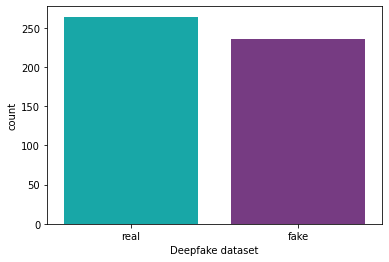

In [ ]:
# check the distribution of target varibale ( the data is balanced or not)
df = pd.DataFrame (image_label, columns = ['target'])
#create bar chart of the number of examples per classes
sns.countplot(x='target',data=df,palette=[[0, 0.75, 0.75],[0.4940, 0.1840, 0.5560] ])
#set the title
plt.xlabel('Deepfake dataset')
plt.title('')
#show the chart
plt.show()

In [ ]:
#loading the image
def load_img(path):
    #loads the image from its file
    image = cv2.imread(path)
    #check if the method returns an empty matrix. 
    if image is None:
        print('Wrong path:', path)
    else:
        #determining the size of the image 
        image = cv2.resize(image, (224, 224))
    #return the image 
    return image[...,::-1]
#Visualization five sample of images
def display(end_path,start_path, Type):
    #resize the image   
    fig = plt.figure(figsize=(10, 10))
    #loop to print fives images 
    for i in range(5):
        #show the images in 4×4 display and incerment i
        plt.subplot(4, 4, i + 1)
        #call the load_img() to get image and show it 
        plt.imshow(load_img(start_path + end_path[i]), cmap='gray')
        #the title of display 
        plt.suptitle((Type +" faces"), fontsize=20)
        #set the axis propreties of graph 
        plt.axis('off')

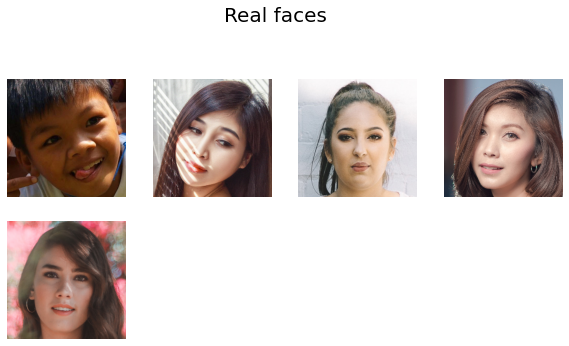

In [ ]:
#To explore the dataset display sample of real image 
display(real_path, real, 'Real')

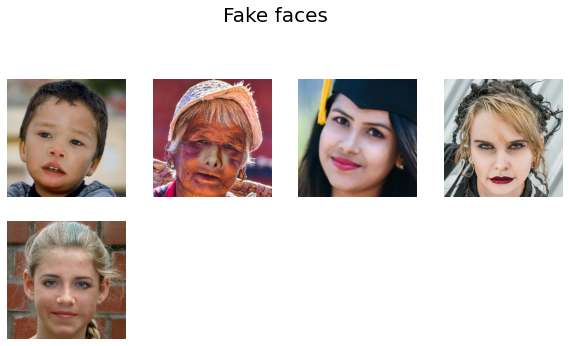

In [ ]:
#To explore the dataset display sample of fake image 
display(fake_path, fake, 'Fake')

- 

## 3.3 Preprocess the data

In [ ]:
# Resize images to 224
SIZE = 224 

#Capture data and labels into respective lists
#declare a list for images
images = []
#declare a list for images label
labels = [] 

# loop for get the label (fake/real)
for directory_path in glob.glob("real_and_fake/*"):
    #loading the image label
    label = directory_path.split("/")[-1] 
    #loop for preprocess the images
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        #loads the image from its file and specifies to load a color image
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)  
        #preprocessing : determining the size of the image    
        img = cv2.resize(img, (SIZE, SIZE)) 
        #preprocessing : to convert an image from one color space to another
        #preprocessing : converting from RGB to BGR 
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 
        # preprocessing: normalization
        img = img / 255.0 
        #add image into images list
        images.append(img)
        #add image label into labels list
        labels.append(label) 

#Convert lists to arrays        
images = np.array(images)
labels = np.array(labels)

In [ ]:
#preprocessing : transformations applied to our data before feeding it to the model 
from sklearn import preprocessing

#Encode labels from text to integers
#Encode class name to 1:real and 0:fake
le = preprocessing.LabelEncoder()

#Fit label encoder 
le.fit(labels)

#Performs fit and transform on the labels at a single time 
labels_encoded = le.transform(labels)

## 3.4 Splitting the data into train and test

In [ ]:
#train_test_split : splitting dataset into two subsets: for training data and for testing data.
from sklearn.model_selection import train_test_split

# X : images, y: labels
#Split data into test and train datasets 
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, train_size=0.75)

#give the number of row (sample) in train set and the size and number of colums 
print(X_train.shape)

#give the number of row (sample) in test set and the size and number of colums
print(X_test.shape)

(374, 224, 224, 3)
(125, 224, 224, 3)


# 4. Model development

## 4.1 Feature extraction using VGG16

- Load the VGG16 pre-trained model

In [ ]:
# Load model wothout classifier/fully connected layers to be used as feature extractor
# to give the classification task to another model
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

# Make loaded layers non-trainable. to use the pre-trained weights in our task
for layer in VGG_model.layers:
	layer.trainable = False

- Extract features using VGG16

In [ ]:
# Use the pre-trained VGG16 to extract features from image (training dataset) 
# the VGG16 expects color input images to be rescaled to the size of 224×224 squares
feature_extractor = VGG_model.predict(X_train)

# Change the shape of extracted features to be the required shape of input data to the SVM
# the required shape of SVM is 2D (number of rows, number of columns)
# the number of rows is the number of the image (training data) that the VGG16 extract from its feature
# we can take the number of rows by the first index in extracted feature shape by the VGG16
# and the number of columns is produced after reshaping the extracted features
# so it is determined by -1 (because we don’t know the new produced dimensions after reshaping)
X_train_features = feature_extractor.reshape(feature_extractor.shape[0], -1)

- Save the output (extracted features) to use it as input to the SVM classifier

In [ ]:
# This is our X input to SVM
X_for_SVM = X_train_features 

In [ ]:
# The shape represent (number of image= rows, number of extracted feature for each image=coloumn)
print(X_for_SVM.shape)

(374, 25088)


## 4.2 Deepfake classification using SVM


Build and Train SVM without Hyperparameter Tuning

In [ ]:
# Build the SVM with default parameters, and set the random state to keep the same results in each run
SVM_model = SVC(random_state = 42)

# Train the SVM  on training data (extracted features) with its labels
SVM_model.fit(X_for_SVM, y_train)

# Send test data through same feature extractor process
# to be used in SVM predction 
X_test_feature = VGG_model.predict(X_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# 5. Model evaluation

Evaluate SVM without Hyperparameter Tuning

- Make prediction

In [ ]:
###### Make predction on train dataset ######
y_train_pred = SVM_model.predict(X_train_features)

# Inverse le transform to get original label back (fake and real)
# Becouse we trained our SVM on integer labels (0 and 1)
y_train_predd = le.inverse_transform(y_train_pred)
y_trainn = le.inverse_transform(y_train) 


###### Make predction on test dataset ######
y_test_pred = SVM_model.predict(X_test_features)


# Inverse le transform to get original label back (fake and real)
# Becouse we trained our SVM on integer labels (0 and 1)
y_test_predd = le.inverse_transform(y_test_pred)
y_testt = le.inverse_transform(y_test) 

- Accuracy, precision, recall and F1 score on train and test dataset

In [ ]:
# calculate each evaluation matrics in training and testing prediction
# traning: to see the overfitting and underfitting
# testing: to see how well our model does

print('The training accuracy: ' + str(accuracy_score(y_trainn, y_train_predd)))
print('The testing accuracy: '+ str(accuracy_score(y_testt, y_test_predd)))

print('\n\n')

print('The traning precision: ' + str(precision_score(y_train, y_train_pred)))
print('The testing precision: ' + str(precision_score(y_test, y_test_pred)))

print('\n\n')

print('The traning recall: ' + str(recall_score(y_train, y_train_pred)))
print('The testing recall: ' + str(recall_score(y_test, y_test_pred)))

print('\n\n')

print('The traning F1: ' + str(f1_score(y_train, y_train_pred)))
print('The testing F1: ' + str(f1_score(y_test, y_test_pred)))

The training accuracy: 0.7914438502673797
The testing accuracy: 0.616



The traning precision: 0.7892156862745098
The testing precision: 0.65625



The traning recall: 0.8214285714285714
The testing recall: 0.6176470588235294



The traning F1: 0.8049999999999998
The testing F1: 0.6363636363636364


- Confusion Matrix 

[Text(0, 0.5, 'Actual'), Text(0.5, 0, 'Predicted')]

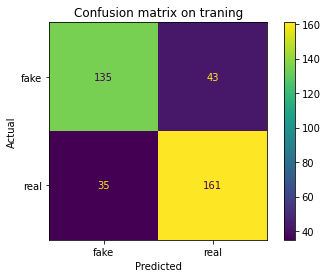

In [ ]:
# Build the confusion matrix for label prediction in traning dataset
cm = confusion_matrix(y_trainn, y_train_predd)

# Build the display object that display the confusion matrix with coreesponding label name
cmd = ConfusionMatrixDisplay(cm, display_labels=['fake','real'])

# Plot the confusion matrix with title and axises names
cmd.plot()
cmd.ax_.set_title("Confusion matrix on traning")
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')

# 0: fake, 1: real
# positive: fake, negative: real

[Text(0, 0.5, 'Actual'), Text(0.5, 0, 'Predicted')]

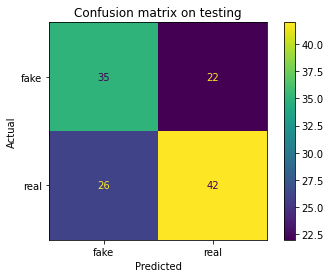

In [ ]:
# Build the confusion matrix for label prediction in testing dataset
cm = confusion_matrix(y_testt, y_test_predd)

# Build the display object that display the confusion matrix with coreesponding label name
cmd = ConfusionMatrixDisplay(cm, display_labels=['fake','real'])

# Plot the confusion matrix with title and axises names
cmd.plot()
cmd.ax_.set_title("Confusion matrix on testing")
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')

# 0: fake, 1: real
# positive: fake, negative: real

# 6. Model improvement

Build and Train SVM with Hyperparameter Tuning using GridSearchCV

In [ ]:
# Defining the common range of parameters values for the SVM model

# C: degree of correct classification. (higher value of C means a small margin = less misclassification)
# kernal: type of hyperplane used to separate the data ('linear'=linear hyperplane, 'rbf'=non linear hyper-plane)
# gamma: is a parameter for 'rbf' representing how exactly the model fits the training data
# high gamma value = perfectly fits the training data which leads to overfitting

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
 ]

# Define the scoring method using make_scorer() 
# we have chosen the precision score
# becouse we force to reduce the FN prediction example
scorer = make_scorer(precision_score) 

# SVM(): the model wihtout parameter value
# param_grid: list of parameters for the model with its range of values
# scoring: gird search will choose best model based on precsion score value
# n_jobs: to use the proceccors in parallel
# refit: after choose the best parammeter, retrain the model on all traning dataset(not just one cross-fold)
# verbose: controls the displayed message. higher value of verbose produce more message while run
grid = GridSearchCV(SVC(), param_grid, scoring=scorer, n_jobs=-1, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_for_SVM, y_train)

# print the best value of precesion score
print('Best Score: %s' % grid.best_score_)

# print best parameter after tuning
print("\nBest parameters set:")
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print("\nBest modelt:")
print(grid.best_estimator_)

# get the best estimtor model
best_model = grid.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Score: 0.6692360057571868

Best parameters set:
{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Best modelt:
SVC(C=10, gamma=0.0001)


Evaluate SVM with Hyperparameter Tuning

- Make prediction

In [ ]:
###### Make predction on train dataset ######
y_train_pred = best_model.predict(X_train_features)

# Inverse le transform to get original label back (fake and real)
# Becouse we trained our SVM on integer labels (0 and 1)
y_train_predd = le.inverse_transform(y_train_pred)
y_trainn = le.inverse_transform(y_train) 


###### Make predction on test dataset ######
y_test_pred = best_model.predict(X_test_features)


# Inverse le transform to get original label back (fake and real)
# Becouse we trained our SVM on integer labels (0 and 1)
y_test_predd = le.inverse_transform(y_test_pred)
y_testt = le.inverse_transform(y_test) 

- Accuracy, precision, recall and F1 score on train and test dataset

In [ ]:
# calculate each evaluation matrics in training and testing prediction
# traning: to see the overfitting and underfitting
# testing: to see how well our model does

print('The training accuracy: ' + str(accuracy_score(y_trainn, y_train_predd)))
print('The testing accuracy: '+ str(accuracy_score(y_testt, y_test_predd)))

print('\n\n')

print('The traning precision: ' + str(precision_score(y_train, y_train_pred)))
print('The testing precision: ' + str(precision_score(y_test, y_test_pred)))

print('\n\n')

print('The traning recall: ' + str(recall_score(y_train, y_train_pred)))
print('The testing recall: ' + str(recall_score(y_test, y_test_pred)))

print('\n\n')

print('The traning F1: ' + str(f1_score(y_train, y_train_pred)))
print('The testing F1: ' + str(f1_score(y_test, y_test_pred)))

The training accuracy: 0.9893048128342246
The testing accuracy: 0.624



The traning precision: 0.9897959183673469
The testing precision: 0.6842105263157895



The traning recall: 0.9897959183673469
The testing recall: 0.5735294117647058



The traning F1: 0.9897959183673469
The testing F1: 0.6239999999999999


- Confusion Matrix 

[Text(0, 0.5, 'Actual'), Text(0.5, 0, 'Predicted')]

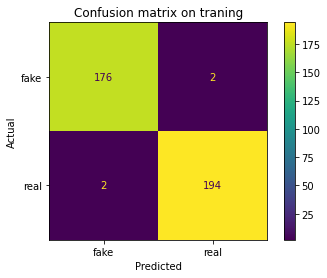

In [ ]:
# Build the confusion matrix for label prediction in traning dataset
cm = confusion_matrix(y_trainn, y_train_predd)

# Build the display object that display the confusion matrix with coreesponding label name
cmd = ConfusionMatrixDisplay(cm, display_labels=['fake','real'])

# Plot the confusion matrix with title and axises names
cmd.plot()
cmd.ax_.set_title("Confusion matrix on traning")
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')

# 0: fake, 1: real
# positive: fake, negative: real

[Text(0, 0.5, 'Actual'), Text(0.5, 0, 'Predicted')]

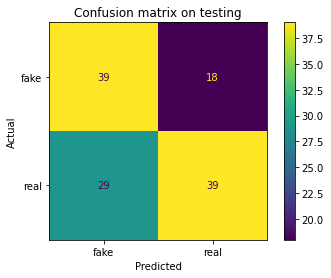

In [ ]:
# Build the confusion matrix for label prediction in testing dataset
cm = confusion_matrix(y_testt, y_test_predd)

# Build the display object that display the confusion matrix with coreesponding label name
cmd = ConfusionMatrixDisplay(cm, display_labels=['fake','real'])

# Plot the confusion matrix with title and axises names
cmd.plot()
cmd.ax_.set_title("Confusion matrix on testing")
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')

# 0: fake, 1: real
# positive: fake, negative: real

# 7. Model Inference/Prediction

The prediction for this image is:  ['real']
The actual label for this image is:  real


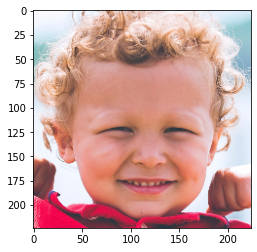

In [ ]:
# Check results on a few select images

# Randomly we chose one image from testing data
n=np.random.randint(0, X_test.shape[0])
img = X_test[n]

# Disply chosen image on the screen
plt.imshow(img)

# preprocessing: resize
img = cv2.resize(img, (SIZE, SIZE)) 

# preprocessing: color space
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 

# preprocessing: normalization
img = img / 255.0 

# Extract features from img
input_img_feature=VGG_model.predict(img)

# Resize input_img_feature to suti image size of SVM 
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)

# predict on input_img afrer feature extraction
prediction_SVM = best_model.predict(input_img_features)[0] 

# Reverse the label encoder to original name
prediction_SVM = le.inverse_transform([prediction_SVM])  
y_testt = le.inverse_transform(y_test) 

# Display prediction and actual classification on the secreen
print("The prediction for this image is: ", prediction_SVM)
print("The actual label for this image is: ", y_testt[n])

# 8. Save the model 

In [ ]:
# Save the model as a pickle in a file
joblib.dump(best_model, 'Deepfake detector.pkl')

['Deepfake detector.pkl']

# 9. Analyze the results
<br>
<font size="3">
In our project, we aim to reduce false negative (FN), which represent classification fake image as a real image. Both Precision and F1 score reduce the FN. Therefore, we run the GirdSeaerchCV two times, the first time we set the score to precision (to choose the best SVM model based on the precision score) and the second time we set the score to F1 score (to choose the best SVM model based on the F1 score). We do that to compare between them and see which of them give better results in test set and better result in train set as shown above in section 6.

•	Run the GirdSeaerchCV on SVM based on F1 score, produce 100% value on training data for all evaluation matrices (overfit). For testing data, it produces low percentage on most of evaluation matrices.
•	Whereas run the GirdSeaerchCV on SVM based on Precision score, produce 98% on training data for all evaluation matrices. For testing data, it produces good percentage on most of evaluation matrices.


Important note, although we do some preprocessing steps and try to improve the performance of the SVM, our model has overfitting problem, the current state-of-the-art deepfake detection method are still suffered from overfitting.

# 10. Conclusion

In conclusion, since we satisfied the required plan, we have achieved what we were aiming to do. A high-precision deepfake detector using CNN(VGG16) as feature extractor and the supervised machine learning classifier SVM to classify with relatively high accuracy and precision given our small dataset which was only 500 images. And we improved the SVM model by the GirdSeaerchCV technique to choose the best SVM model (best hyperparameter value). The GirdSeaerchCV evaluated based on many metrics then ended up choosing the precision score.